# Hypothesis Testing


We would like to know if the effects we see in the sample(observed data) are likely to occur in the population. 

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
> Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

1. Compute test statistic
2. Define null hypothesis
3. Compute p-value
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
weed_pd = pd.read_csv("../data/Weed_Price.csv", parse_dates=[-1])

In [4]:
weed_pd["month"] = weed_pd.date.apply(lambda x: x.month)
weed_pd["year"] = weed_pd.date.apply(lambda x: x.year)

In [5]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


### Let's work on weed prices in California in 2014


In [6]:
weed_ca_2014 = weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014)]

In [7]:
#Mean and standard deviation of high quality weed's price
print "Mean:", weed_ca_2014.HighQ.mean()
print "Standard Deviation:", weed_ca_2014.HighQ.std()

Mean: 245.894230769
Standard Deviation: 1.28990793937


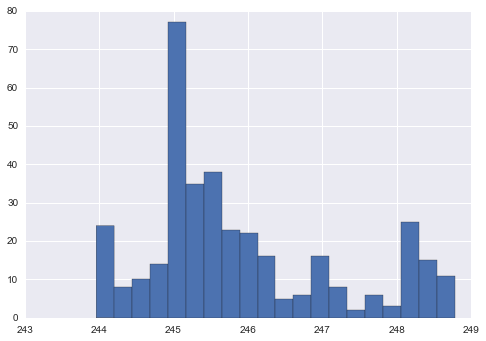

In [8]:
weed_ca_2014['HighQ'].hist(bins=20)

In [9]:
#Confidence interval on the mean
stats.norm.interval(0.95, 
                    loc=weed_ca_2014.HighQ.mean(), 
                    scale=weed_ca_2014.HighQ.std()/np.sqrt(len(weed_ca_2014)))

(245.76171849272572, 246.02674304573583)

### Question: Are high-quality weed prices in Jan 2014 significantly higher than in Jan 2015?

In [10]:
#Get the data
weed_ca_jan2014 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2014) & (weed_pd.month==1)].HighQ)
weed_ca_jan2015 = np.array(weed_pd[(weed_pd.State=="California") & (weed_pd.year==2015) & (weed_pd.month==1)].HighQ)

In [11]:
print "Mean-2014 Jan:", weed_ca_jan2014.mean()
print "Mean-2015 Jan:", weed_ca_jan2015.mean()

Mean-2014 Jan: 248.445483871
Mean-2015 Jan: 243.602258065


In [12]:
print "Effect size:", weed_ca_jan2014.mean() - weed_ca_jan2015.mean()

Effect size: 4.84322580645


In [13]:
# same variance? close, reasonable to use "equal variance" in ttest later
print(weed_ca_jan2014.var())
print(weed_ca_jan2015.var())

0.030018314256
0.0432368366285


**Null Hypothesis**: Mean prices aren't significantly different

Perform **t-test** and determine the p-value. 

In [15]:
stats.ttest_ind(weed_ca_jan2014, weed_ca_jan2015, equal_var=True)

Ttest_indResult(statistic=98.011325238158051, pvalue=6.2979718185084028e-68)

p-value is the probability that the effective size was by chance. And here, p-value is almost 0.

*Conclusion*: The price difference is significant. But is a price increase of $4.85 a big deal? The price decreased in 2015 by almost 2%. Always remember to look at effect size. 

**Problem** Determine if prices of medium quality weed for Jan 2015 and Feb 2015 are significantly different for New York. 

In [24]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


In [17]:
ny_jan15 = weed_pd[(weed_pd['State'] == 'New York') &
                   (weed_pd['year'] == 2015) &
                   # month 1 = Jan
                   (weed_pd['month'] == 1)]['MedQ']


ny_feb15 = weed_pd[(weed_pd['State'] == 'New York') &
                   (weed_pd['year'] == 2015) &
                   # month 2 = Feb
                   (weed_pd['month'] == 2)]['MedQ']

In [19]:
# we can use the array-like pd.Series in ttest_ind()
stats.ttest_ind(ny_jan15, ny_feb15, equal_var=True)

Ttest_indResult(statistic=6.8892445646016629, pvalue=1.4876340462804882e-08)

$\rightarrow$ `p << 0.05` so we reject the null hypothesis that the two distributions _are not_ significantly different and conclude that the difference _is likely_ significant.

### Assumption of t-test

One assumption is that the data used came from a normal distribution. 
<br>
There's a [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro-Wilk) to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal.

In [23]:
test_stat, pval = stats.shapiro(weed_ca_jan2015)
pval

0.12818680703639984

In [24]:
test_stat, pval = stats.shapiro(weed_ca_jan2014)
pval

0.06141229346394539

> shapiro test tests the null hypothesis that the data was drawn from a normal distribution.

$\rightarrow$ large p values fail to reject null hypothesis $\rightarrow$ reasonably assume normal distribution

In [34]:
#We seem to be good.

### A/B testing

Comparing two versions to check which one performs better. Eg: Show to people two variants for the same webpage that they want to see and find which one provides better conversion rate (or the relevant metric). [wiki](https://en.wikipedia.org/wiki/A/B_testing)

**Exercise: Impact of regulation and deregulation.**

Information on regulation of Weed in the US by State [wiki](Impact of regulation and deregulation on a couple of states )

1. Alaska legalized it on 4th Nov 2014. Find if prices significantly changed in Dec 2014 compared to Oct 2014. 
2. Maryland decriminalized possessing weed from Oct 1, 2014. Find if prices of weed changed significantly in Oct 2014 compared to Sep 2014

In [30]:
# 1. AK oct v. dec 2014
ak_oct14 = weed_pd[(weed_pd['State'] == "Alaska") & 
                   (weed_pd['year'] == 2014) & 
                   (weed_pd['month'] == 10)]['HighQ'] 

ak_dec14 = weed_pd[(weed_pd['State'] == "Alaska") & 
                   (weed_pd['year'] == 2014) & 
                   (weed_pd['month'] == 12)]['HighQ'] 
              
print("AK oct mean/var: {} ({})".format(ak_oct14.mean(),ak_oct14.var()))
print("AK dec mean/var: {} ({})".format(ak_dec14.mean(),ak_dec14.var()))

AK oct mean/var: 291.552580645 (0.143353118282)
AK dec mean/var: 301.836774194 (14.1541759139)


In [31]:
# note that variances are very different
stats.ttest_ind(ak_oct14, ak_dec14, equal_var=False)

Ttest_indResult(statistic=-15.14330239573019, pvalue=9.1906142471347441e-16)

$\rightarrow$ very small p value means we can reject the null hypothesis that the prices _are not_ significantly different and conclude that they _reasonably are_ difference

In [36]:
# 2. MD sept v. oct 2014
md_sept14 = weed_pd[(weed_pd['State'] == "Maryland") & 
                   (weed_pd['year'] == 2014) & 
                   (weed_pd['month'] == 9)]['HighQ'] 

md_oct14 = weed_pd[(weed_pd['State'] == "Maryland") & 
                   (weed_pd['year'] == 2014) & 
                   (weed_pd['month'] == 10)]['HighQ'] 
              
print("MD sept mean/var: {} ({})".format(md_sept14.mean(),md_sept14.var()))
print("MD oct mean/var: {} ({})".format(md_oct14.mean(),md_oct14.var()))

MD sept mean/var: 370.110333333 (0.0547067815566)
MD oct mean/var: 369.292258065 (0.0914180644477)


In [37]:
# note that variances are pretty close
stats.ttest_ind(md_sept14, md_oct14, equal_var=True)

Ttest_indResult(statistic=11.792342843072809, pvalue=3.7425820416130481e-17)

$\rightarrow$ very small p value means we can reject the null hypothesis that the prices _are not_ significantly different and conclude that they _reasonably are_ difference

<h2> Something to think about: Which of these give smaller p-values ? </h2>
   
   * Smaller effect size
   * Smaller standard error
   * Smaller sample size
   * Higher variance
   
   **Answer:** 

# Chi-square tests

Chi-Square tests are used when the data are frequencies, rather than numerical score/price.

The following two tests make use of chi-square statistic

1. chi-square test for goodness of fit
2. chi-square test for independence

Chi-square test is a non-parametric test. They do not require assumptions about population parameters and they do not test hypotheses about population parameters.

<h2> Chi-Square test for goodness fit </h2>

$$ \chi^2 = \sum (O - E)^2/E $$

* O is observed frequency
* E is expected frequency
* $ \chi $ is the chi-square statistic

Let's assume the proportion of people who bought High, Medium and Low quality weed in Jan-2014 as the expected proportion. Find if proportion of people who bought weed in Jan 2015 conformed to the norm

In [44]:
weed_jan2014 = weed_pd[(weed_pd.year==2014) & (weed_pd.month==1)][["HighQN", "MedQN", "LowQN"]]
weed_jan2015 = weed_pd[(weed_pd.year==2015) & (weed_pd.month==1)][["HighQN", "MedQN", "LowQN"]]

In [45]:
expected = np.array(weed_jan2014.apply(sum, axis=0))
observed = np.array(weed_jan2015.apply(sum, axis=0))

In [46]:
print "Expected:", expected, "\n" , "Observed:", observed

Expected: [2918004 2644757  263958] 
Observed: [4057716 4035049  358088]


In [47]:
print "Expected:", expected/np.sum(expected.astype(float)), "\n" , "Observed:", observed/np.sum(observed.astype(float))

Expected: [ 0.5007971   0.45390159  0.04530131] 
Observed: [ 0.48015461  0.47747239  0.042373  ]


In [48]:
stats.chisquare(observed, expected)

Power_divergenceResult(statistic=1209562.2775169075, pvalue=0.0)

*Inference* : We reject null hypothesis. The proportions in Jan 2015 is different than what was expected.